## Identifying Friendly Squirrels ##

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


In [2]:
import numpy as np 
import pandas as pd

In [4]:
# Load dataset
df_original = pd.read_csv('/Users/songxiaoke/Desktop/1030project_squirrels/data/central_part_squirrels.csv')
print(df_original.shape)
df_original.head()

(3023, 31)


,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [5]:
# calculate total missing values with raw table
sum(df_original.isnull().sum())

12197

In [6]:
# Drop columns provide no predictive values
columns_to_drop = ['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Date', 
                   'Hectare Squirrel Number', 'Highlight Fur Color', 
                   'Combination of Primary and Highlight Color', 'Specific Location',
                   'Color notes', 'Lat/Long', 'Above Ground Sighter Measurement',
                  'Other Interactions','Other Activities']
df = df_original.drop(columns=columns_to_drop)
print(df.shape)
df.head()

(3023, 17)


,Shift,Age,Primary Fur Color,Location,Running,Chasing,Climbing,Eating,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from
0,PM,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False
1,AM,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False
2,PM,NaN,Gray,Above Ground,False,True,False,False,False,False,False,False,False,False,False,False,False
3,PM,Adult,Gray,NaN,False,False,False,True,True,False,False,False,False,False,False,False,True
4,AM,Adult,Gray,Above Ground,False,False,False,False,True,False,False,False,False,False,False,False,False


## EDA ##

In [7]:
import matplotlib 
from matplotlib import pylab as plt

In [8]:
# Identify data types for each columns
print(df.dtypes)

Shift                object
Age                  object
Primary Fur Color    object
Location             object
Running                bool
Chasing                bool
Climbing               bool
Eating                 bool
Foraging               bool
Kuks                   bool
Quaas                  bool
Moans                  bool
Tail flags             bool
Tail twitches          bool
Approaches             bool
Indifferent            bool
Runs from              bool
dtype: object


In [9]:
# Check Missing value
df.isnull().sum()

Shift                  0
Age                  121
Primary Fur Color     55
Location              64
Running                0
Chasing                0
Climbing               0
Eating                 0
Foraging               0
Kuks                   0
Quaas                  0
Moans                  0
Tail flags             0
Tail twitches          0
Approaches             0
Indifferent            0
Runs from              0
dtype: int64

In [10]:
print(df['Age'].unique())

[nan 'Adult' 'Juvenile' '?']


In [11]:
df['Age'] = df['Age'].replace('?', np.nan)
df['Age'] = df['Age'].fillna('Unknown') 
print(df['Age'].unique())

['Unknown' 'Adult' 'Juvenile']


In [12]:
print(df['Primary Fur Color'].unique())

[nan 'Gray' 'Cinnamon' 'Black']


In [13]:
df['Primary Fur Color'] = df['Primary Fur Color'].fillna('Unknown') 
print(df['Primary Fur Color'].unique())

['Unknown' 'Gray' 'Cinnamon' 'Black']


In [14]:
print(df['Location'].unique())

[nan 'Above Ground' 'Ground Plane']


In [15]:
df['Location'] = df['Location'].fillna('Unknown') 
print(df['Location'].unique())

['Unknown' 'Above Ground' 'Ground Plane']


[False  True]
Approaches
False    2845
True      178
Name: count, dtype: int64


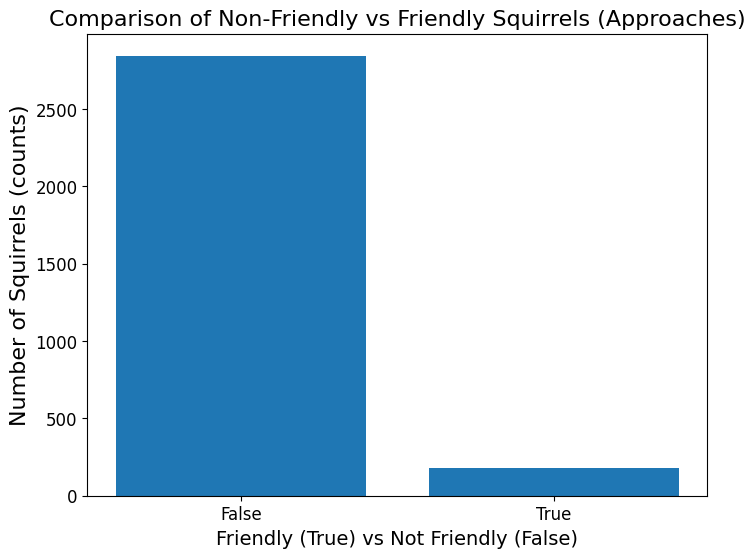

In [16]:
# Check distribution of target variable 'Approaches'
print(df['Approaches'].unique())
print(df['Approaches'].value_counts())

# A bar plot to show distribution
plt.figure(figsize = (8,6))
plt.bar(df['Approaches'].value_counts().index.astype(str), height = df_original['Approaches'].value_counts().values)
plt.title('Comparison of Non-Friendly vs Friendly Squirrels (Approaches)', fontsize=16)
plt.xlabel('Friendly (True) vs Not Friendly (False)', fontsize=14)
plt.ylabel('Number of Squirrels (counts)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

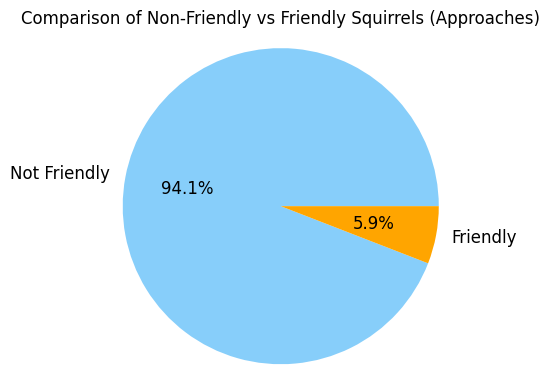

In [17]:
# Similar but Pie Plot
plt.figure(figsize=(5, 4))
plt.pie(df_original['Approaches'].value_counts(), labels=['Not Friendly', 'Friendly'], 
        autopct='%1.1f%%', textprops={'fontsize': 12}, colors = ['lightskyblue', 'orange'])
plt.title('Comparison of Non-Friendly vs Friendly Squirrels (Approaches)', fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()

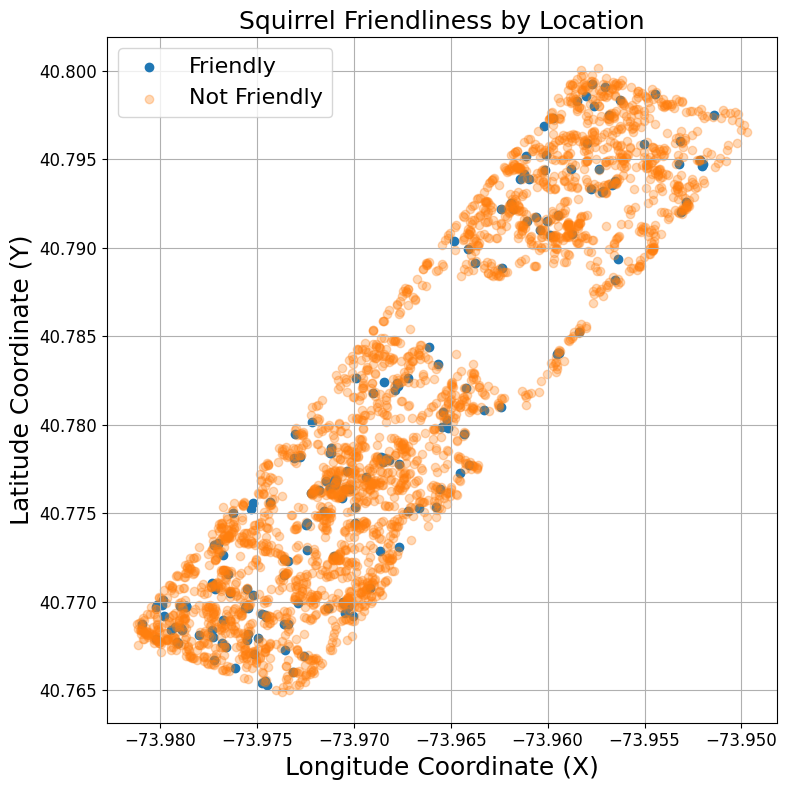

In [18]:
# Scatter plot to visualize if squirrel friendliness based on coordinates
plt.figure(figsize=(8, 8))

# Plot friendly squirrels (Approaches = True)
plt.scatter(df_original[df_original['Approaches'] == True]['X'], 
            df_original[df_original['Approaches'] == True]['Y'], 
            label='Friendly', alpha=1)

# Plot non-friendly squirrels (Approaches = False)
plt.scatter(df_original[df_original['Approaches'] == False]['X'], 
            df_original[df_original['Approaches'] == False]['Y'], 
            label='Not Friendly', alpha=0.3)

plt.xlabel('Longitude Coordinate (X)', fontsize=18)
plt.ylabel('Latitude Coordinate (Y)', fontsize=18)
plt.title('Squirrel Friendliness by Location', fontsize=18)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.tight_layout()
plt.show()

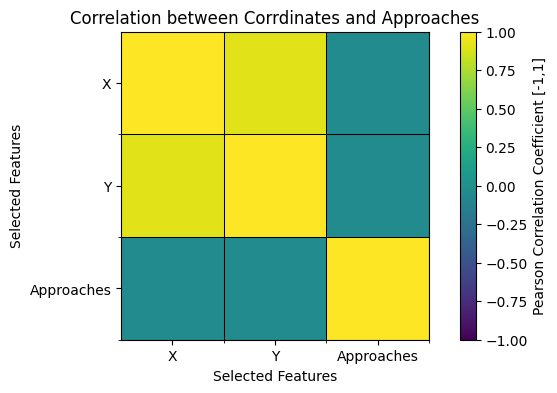

In [19]:
# Test Correlation Between Approaches and X, Y

selected = ['X', 'Y', 'Approaches']

corr_matrix = df_original[selected].corr()

plt.figure(figsize = (8,4))
plt.imshow(corr_matrix, vmin = -1, vmax = 1)
plt.colorbar(label = 'Pearson Correlation Coefficient [-1,1]')

ax = plt.gca()
ax.set_xticks(np.arange(len(corr_matrix.columns)) + 0.5, minor=True)
ax.set_yticks(np.arange(len(corr_matrix.columns)) + 0.5, minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=0.75)

plt.title('Correlation between Corrdinates and Approaches')
plt.xlabel('Selected Features')
plt.ylabel('Selected Features')
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

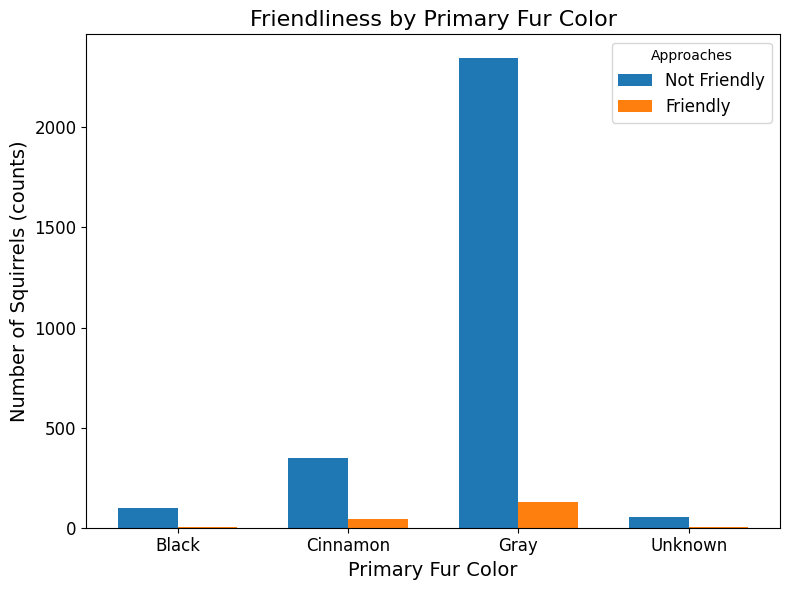

In [20]:
# Whether squirrels of different fur colors are more or less likely to approach humans
fur_counts = df.groupby('Primary Fur Color')['Approaches'].value_counts().unstack(fill_value=0)

# Create a bar plot
bar_width = 0.35
index = np.arange(len(fur_counts))
plt.figure(figsize=(8, 6))
plt.bar(index, fur_counts[False], bar_width, label='Not Friendly')
plt.bar(index + bar_width, fur_counts[True], bar_width, label='Friendly')
plt.title('Friendliness by Primary Fur Color', fontsize=16) 
plt.xlabel('Primary Fur Color', fontsize=14)  
plt.ylabel('Number of Squirrels (counts)', fontsize=14)  
plt.xticks(index + bar_width / 2, fur_counts.index, fontsize=12)
plt.yticks(fontsize=12) 
plt.legend(['Not Friendly', 'Friendly'], title="Approaches", fontsize=12)
plt.tight_layout()
plt.show()

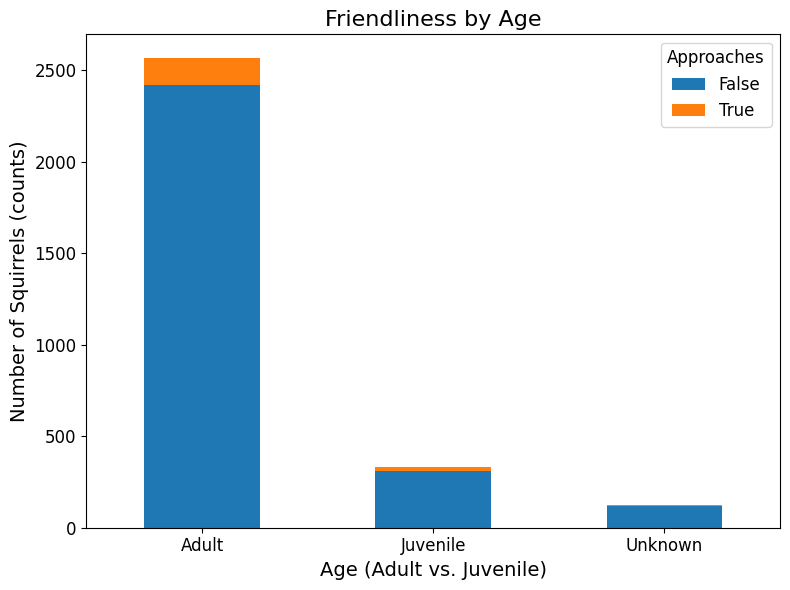

In [21]:
# Visulaize if age (adult vs. juvenile) affects how friendly squirrels are
age_counts = df.groupby('Age')['Approaches'].value_counts().unstack().dropna()

# Stacked bar plot
age_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Friendliness by Age', fontsize=16)  
plt.xlabel('Age (Adult vs. Juvenile)', fontsize=14)  
plt.ylabel('Number of Squirrels (counts)', fontsize=14)
plt.xticks(rotation=0, fontsize=12) 
plt.yticks(fontsize=12)
plt.legend(title="Approaches", fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.show()

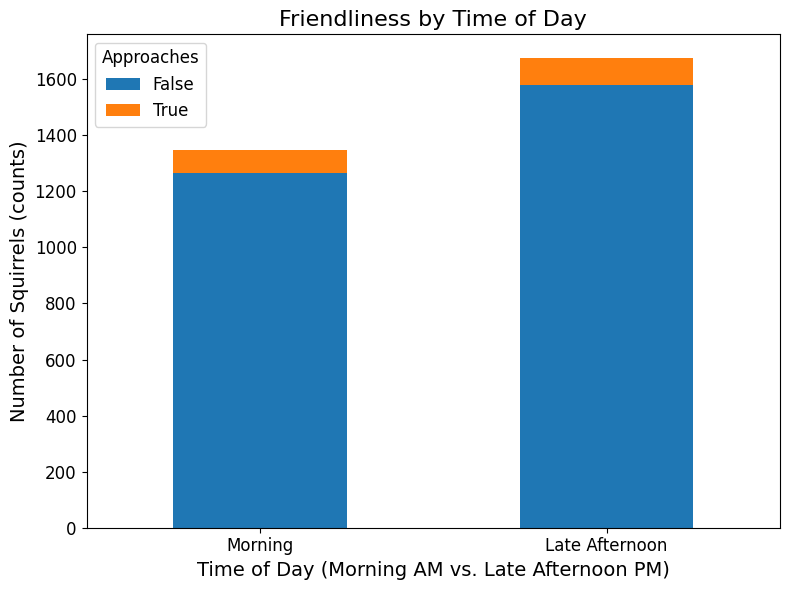

In [22]:
# if the time of day (shift: morning vs. late afternoon) influences squirrel behavior 
shift_approach = df.groupby('Shift')['Approaches'].value_counts().unstack()

# stacked bar plot
shift_approach.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Friendliness by Time of Day', fontsize=16)  
plt.xlabel('Time of Day (Morning AM vs. Late Afternoon PM)', fontsize=14)  
plt.ylabel('Number of Squirrels (counts)', fontsize=14)
plt.xticks([0, 1], ['Morning', 'Late Afternoon'], rotation = 0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Approaches", fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.show()

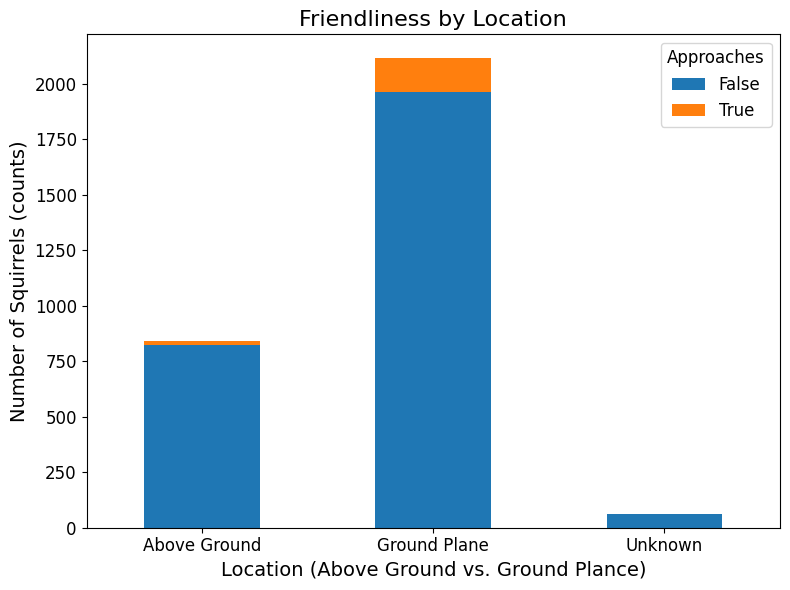

In [23]:
# if the location (above ground vs. ground plane) influences squirrel behavior 
shift_approach = df.groupby('Location')['Approaches'].value_counts().unstack()

# stacked bar plot
shift_approach.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Friendliness by Location', fontsize=16)  
plt.xlabel('Location (Above Ground vs. Ground Plance)', fontsize=14)  
plt.ylabel('Number of Squirrels (counts)', fontsize=14)
plt.xticks([0, 1, 2], ['Above Ground', 'Ground Plane', 'Unknown'], rotation = 0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Approaches", fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.show()

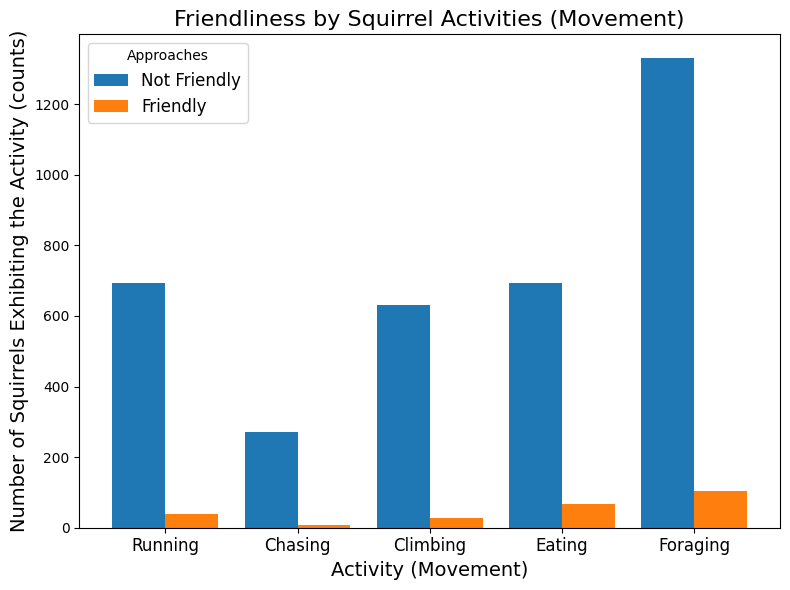

In [24]:
# Activities as a signal

# Group 1: Running, Chasing, Climbing, Eating, Foraging
activity_group_1 = ['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging']
activity_approach_counts_1 = df.groupby('Approaches')[activity_group_1].sum().T

# Plot the results in a bar plot for group 1
plt.figure(figsize=(8, 6))
activity_approach_counts_1.plot(kind='bar', ax=plt.gca(), width=0.8)  # Remove stacked=True
plt.title('Friendliness by Squirrel Activities (Movement)', fontsize=16)
plt.xlabel('Activity (Movement)', fontsize=14)
plt.ylabel('Number of Squirrels Exhibiting the Activity (counts)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(['Not Friendly', 'Friendly'], title="Approaches", fontsize=12)
plt.tight_layout()
plt.show()


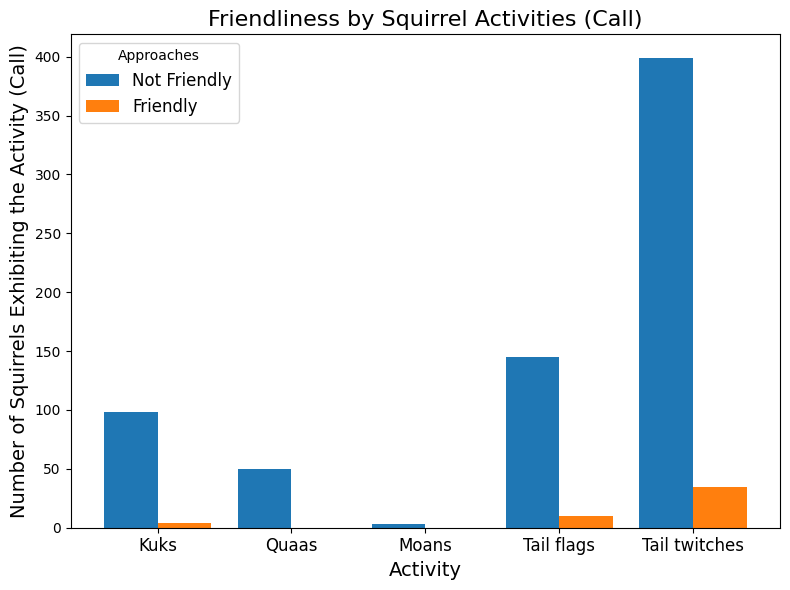

In [25]:
# Group 2: Kuks, Quaas, Moans, Tail flags, Tail twitches
activity_group_2 = ['Kuks', 'Quaas', 'Moans', 'Tail flags', 'Tail twitches']
activity_approach_counts_2 = df.groupby('Approaches')[activity_group_2].sum().T

# Plot the results in a stacked bar plot for group 2
plt.figure(figsize=(8, 6))
activity_approach_counts_2.plot(kind='bar', ax=plt.gca(), width = 0.8)
plt.title('Friendliness by Squirrel Activities (Call)', fontsize=16)
plt.xlabel('Activity', fontsize=14)
plt.ylabel('Number of Squirrels Exhibiting the Activity (Call)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(['Not Friendly', 'Friendly'], title="Approaches", fontsize=12)
plt.tight_layout()
plt.show()

## Data Splitting ##

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [27]:
y = df['Approaches'] # targeted variable
X = df.loc[:, df.columns != 'Approaches'] # feature matrix

def StratifiedSplit(X, y, random_state, test_size, n_splits):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size = test_size, stratify = y, random_state = random_state)

    kf = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = random_state)
    for train_idx, val_idx in kf.split(X_other, y_other):
        X_train = X_other.iloc[train_idx]
        y_train = y_other.iloc[train_idx]
        X_val = X_other.iloc[val_idx]
        y_val = y_other.iloc[val_idx]

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = StratifiedSplit(X, y, random_state = 42, test_size = 0.2, n_splits = 4)

print('X_train:')
print(X_train.head())
print('X_val:')
print(X_val.head())
print('X_test:')
print(X_test.head())

X_train:
     Shift    Age Primary Fur Color      Location  Running  Chasing  Climbing  \
766     AM  Adult              Gray  Ground Plane    False    False      True   
2607    AM  Adult          Cinnamon  Ground Plane    False    False     False   
1373    PM  Adult              Gray  Above Ground    False    False      True   
1974    PM  Adult              Gray  Above Ground    False    False      True   
932     PM  Adult          Cinnamon  Ground Plane    False    False      True   

      Eating  Foraging   Kuks  Quaas  Moans  Tail flags  Tail twitches  \
766     True      True  False  False  False       False          False   
2607   False      True  False  False  False       False          False   
1373   False     False  False  False  False       False          False   
1974   False     False  False   True  False       False          False   
932    False      True  False  False  False       False          False   

      Indifferent  Runs from  
766         False       True

In [28]:
# Check the size of each set
print(f'Feature Matrix Size: {X.shape[0]}')
print(f'Training Set Size: {X_train.shape[0]}')
print(f'Validation Set Size: {X_val.shape[0]}')
print(f'Testing Set Size: {X_test.shape[0]}')

Feature Matrix Size: 3023
Training Set Size: 1814
Validation Set Size: 604
Testing Set Size: 605


In [29]:
# Check if all Stratified works
print(f'Unique Approaches in Train Set: {y_train.unique()}')
print(f'Unique Approaches in Validation Set: {y_val.unique()}')
print(f'Unique Approaches in Test Set: {y_test.unique()}')

Unique Approaches in Train Set: [False  True]
Unique Approaches in Validation Set: [False  True]
Unique Approaches in Test Set: [False  True]


## Data Preprocessing ##

In [30]:
X_train.dtypes

Shift                object
Age                  object
Primary Fur Color    object
Location             object
Running                bool
Chasing                bool
Climbing               bool
Eating                 bool
Foraging               bool
Kuks                   bool
Quaas                  bool
Moans                  bool
Tail flags             bool
Tail twitches          bool
Indifferent            bool
Runs from              bool
dtype: object

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define different-types features
categorical_ftrs = ['Shift', 'Age', 'Primary Fur Color', 'Location']
boolean_ftrs = ['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging', 
                'Kuks', 'Quaas', 'Moans', 'Tail flags', 'Tail twitches', 
                'Indifferent', 'Runs from']

# Apply preprocessing and Combine all transformers
preprocessor = ColumnTransformer(
    transformers = [
        ('onehot', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'), categorical_ftrs),
        ('boolean', StandardScaler(), boolean_ftrs)])

clf = Pipeline(steps = [('preprocessor', preprocessor)])

# Fit (and transform) data using preprocessor
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

In [33]:
print(f'Number of features before preprocessed: {X_train.shape[1]}')
print(f'Number of features after preprocessed: {X_train_prep.shape[1]}')

Number of features before preprocessed: 16
Number of features after preprocessed: 24
